# KNN
## 1. 算法描述
### 训练
训练只需要存储数据，没有真正训练的过程。对于有n个样本数据集，KNN的时间复杂度O(1), 空间复杂度O(n)
### 测试
测试需要进行训练，因此时间复杂度为O(n),训练过程耗时也是KNN算法的缺点之一。具体算法过程如下:
1. 对于测试集中每个样本点，计算该样本点和训练数据中每个样本之间的距离distance;
2. 按照距离的递增次序排序，并选择距离最小的k个点;
3. 确定前k个样本的类别，最多的类别即认为是测试样本预测的标签;

## 2. 代码实现（step-by-step）
### 创建一个数据集
手动创建一个小规模的数据集，让我们的算法在该数据集上正确运行，调试完成后在将我们的算法封装，并在其他数据集上测试。

In [1]:
import numpy as np
def createDataSet():
    X_train = np.array([[3.393533211, 2.331273381],
                       [3.110073483, 1.781539638],
                       [1.343808831, 3.368360954],
                       [3.582294042, 4.679179110],
                       [2.280362439, 2.866990263],
                       [7.423469421, 4.694522875],
                       [5.745051997, 3.533989803],
                       [9.172168622, 2.511101045],
                       [7.792783481, 3.424088941],
                       [7.939820817, 0.791637231]])
    y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
    X_test = np.array([5.43232312, 2.33435454])
    return X_train, y_train, X_test

 

调用createDataSet()函数，并答应数组纬度，确保正确。

In [2]:
X_train, y_train, X_test = createDataSet()
print("X_train.shape: " + str(X_train.shape) + ", y_train.shape: " + str(y_train.shape))
print("X_test.shape: " + str(X_test.shape) + "\n" + str(X_test))

X_train.shape: (10, 2), y_train.shape: (10,)
X_test.shape: (2,)
[5.43232312 2.33435454]


In [3]:
X_train[y_train == 1]

array([[7.42346942, 4.69452287],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

可视化数据，方便更好的观察数据。

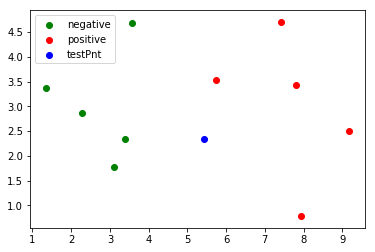

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='g', label='negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color = 'r', label='positive')
plt.scatter(X_test[0], X_test[1], color='b', label='testPnt')
plt.legend()
plt.show()

### 计算距离1
使用$L_2$距离来衡量两个样本点$L_1$和$L_2$之间的距离:
$$
    L_2(I_1, I_2) = \sqrt{\sum_{i=1}^n(I_1^{(i)} - I_2^{(i)})^2}
$$

In [5]:
def computerDistance1(X_train, X_test):
    m, n = X_train.shape
    distances = np.sqrt(((X_train - X_test)**2).sum(axis=1))
    return distances 

输出距离计算的结果，观察是否正确

In [6]:
print(computerDistance1(np.array([[1, 2, 3]]), np.array([3, 4, 5])))
distances = computerDistance1(X_train, X_test)
print(distances)

[3.46410162]
[2.03879224 2.38714216 4.21724061 2.98677248 3.19664777 3.08788895
 1.23972744 3.74401973 2.59986426 2.94406545]


将距离distances按升序排列，取前k个训练样本的标签作为测试样本的标签

In [7]:
from collections import Counter
k = 3
k_indexes = distances.argsort()[:k]
counter = Counter(y_train[k_indexes])
pred = np.squeeze(counter.most_common(1))[0]

In [8]:
print("test label is predicted as:", pred)

test label is predicted as: 0


### 计算距离2
在computeDistance1(X_train, X_test)函数中，X_train.shape==(m, n), X_test.shape==(n,)，其中$m$是训练样本数，$n$是样本的特征值。而实际测试中，我们的X_test可能有很多组，也就是说X_test.shape==(t, n)，$t$为测试样本数。现在我们需要编写一个新的距离计算函数computeDistance2(X_train, X_test)，X_train, X_test两者的维度不一样，我们不是用**for**循环，直接使用向量化操作加速计算距离，最终的distances是一个$t*n$的矩阵。

In [9]:
def computeDistance2(X_train, X_test):
    """
        X_train.shape == (m, n)
        X_test.shape == (t, n)
    """
    M = np.dot(X_test, X_train.T)
    t, n = M.shape
    te = np.diag(np.dot(X_test, X_test.T))
    tr = np.diag(np.dot(X_train, X_train.T))
    te = np.repeat(te, n).reshape(M.shape)
    tr = np.tile(tr, t).reshape(M.shape)
    return np.sqrt(te + tr - 2 * M)

测试computeDistance2()函数，distances2[0,:]应该和computeDistance1()的返回结果相同。

In [10]:
X_test_1 = np.array([[5.43232312, 2.33435454], [7.532321223, 4.334345453]])
distances2 = computeDistance2(X_train, X_test_1)
print(distances2)

[[2.03879224 2.38714216 4.21724061 2.98677248 3.19664777 3.08788895
  1.23972744 3.74401973 2.59986426 2.94406545]
 [4.59802827 5.1061818  6.26345046 3.96505044 5.45309108 0.37626651
  1.95829019 2.4522071  0.94678799 3.56606751]]


## 代码实现(encapsulation)

In [11]:
class KNN:
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def _computeDistance(self, X_test):
        M = np.dot(X_test, self.X_train.T)
        t, n = M.shape
        te = np.diag(np.dot(X_test, X_test.T))
        tr = np.diag(np.dot(self.X_train, self.X_train.T))
        te = np.repeat(te, n).reshape(M.shape)
        tr = np.tile(tr, t).reshape(M.shape)
        return np.sqrt(te + tr - 2 * M)
    
    def predict(self, X_test, k):
        return self._predict(X_test, k)
    
    def _predict(self, X_test, k=1):
        distances = self._computeDistance(X_test)
        num_test = distances.shape[0]
        k_indexes = distances.argsort()[:, :k]
        y_pred_labels = np.zeros(num_test)
        for i in range(num_test):
            counter = Counter(self.y_train[k_indexes[i, :]])
            y_pred_labels[i] = np.squeeze(counter.most_common(1))[0]
        return y_pred_labels
    def compute_error_rate(X_test， y_test, k):
        y_pred_labels = self.predict(X_test, k)
        error_count = np.sum(y_pred_labels, y_test)
        return error_count / y_test

In [12]:
X_train, y_train, X_test_1

(array([[3.39353321, 2.33127338],
        [3.11007348, 1.78153964],
        [1.34380883, 3.36836095],
        [3.58229404, 4.67917911],
        [2.28036244, 2.86699026],
        [7.42346942, 4.69452287],
        [5.745052  , 3.5339898 ],
        [9.17216862, 2.51110105],
        [7.79278348, 3.42408894],
        [7.93982082, 0.79163723]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
 array([[5.43232312, 2.33435454],
        [7.53232122, 4.33434545]]))

In [13]:
knn = KNN()

In [14]:
knn.train(X_train, y_train)
k = 3
labels = knn.predict(X_test_1, k)
print(labels)

[0. 1.]


将写好的KNN算法放入**utils**模块中，方便我们在knn应用程序中直接调用。

In [15]:
import utils 
import numpy as np

In [16]:
knn1 = utils.KNN()
knn1.train(X_train, y_train)
k1 = 3
labels1 = knn1.predict(X_test_1, k1)
print(labels1)

[0. 1.]


从utils模块中导入的KNN和jupyter notebook中的KNN运行结果相同。